In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
from sklearn.linear_model import LinearRegression

# House Price Prediction using Kaggle

In [44]:
train = pd.read_csv("Housetrain.csv")
test = pd.read_csv("Housetest.csv")

In [45]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


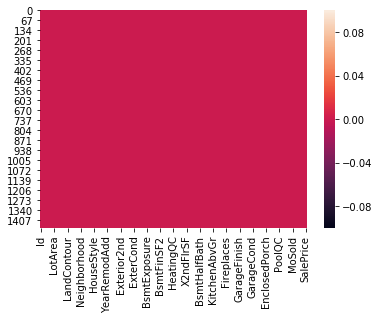

In [46]:
#Checking the heatmap to find out the null value, if there is sum null value it will have white or black lines
sns.heatmap(train.isnull())

In [47]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [48]:
SalePrice = ['SalePrice']

In [49]:
#Converting the Data into Dummies
newtrain = pd.get_dummies(x)

In [50]:
newtrain.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [ ]:
n=

In [51]:
#Apply standard scaler then drop the saleprice column
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [ ]:
s

In [53]:
anothernewtrain = sc.fit_transform(newtrain)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
onemoretrain = pd.DataFrame(anothernewtrain)

In [55]:
onemoretrain.columns = newtrain.columns

In [56]:
onemoretrain.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [70]:
finaltrain = onemoretrain.drop("Id",axis=1)

In [71]:
#Create the a copy of Scaled Data
finaltrain.copy = finaltrain

In [72]:
from sklearn.decomposition import PCA

In [73]:
#No. of components = 120
pc = PCA(n_components=None)

In [81]:
#How much first 120 pca - components are contributing 
variance = 0 
for i in range(120):
    variance = variance + pc.explained_variance_ratio_[i]
variance
    

0.8213427744671231

In [74]:
finaltrain = pc.fit_transform(finaltrain)

In [75]:
pc.explained_variance_ratio_*100

array([6.49536942e+00, 2.90780864e+00, 2.38958260e+00, 1.95343917e+00,
       1.66342013e+00, 1.59482114e+00, 1.43819736e+00, 1.28899690e+00,
       1.27100312e+00, 1.20646154e+00, 1.15281796e+00, 1.10578571e+00,
       1.07061122e+00, 1.04732817e+00, 1.00249674e+00, 9.74886237e-01,
       9.71694754e-01, 9.35493195e-01, 9.31830545e-01, 8.87095792e-01,
       8.69766278e-01, 8.49125195e-01, 8.44291835e-01, 8.27399413e-01,
       8.11204655e-01, 8.00024492e-01, 7.90256744e-01, 7.73724306e-01,
       7.56288228e-01, 7.52634439e-01, 7.39272686e-01, 7.29230211e-01,
       7.22350330e-01, 7.07113463e-01, 7.00739912e-01, 6.94820056e-01,
       6.92455181e-01, 6.79942966e-01, 6.63677645e-01, 6.48059714e-01,
       6.37159064e-01, 6.34461880e-01, 6.27204224e-01, 6.10932458e-01,
       6.00554894e-01, 5.97708175e-01, 5.91345094e-01, 5.87641158e-01,
       5.71543665e-01, 5.70103191e-01, 5.66496164e-01, 5.57561261e-01,
       5.50787732e-01, 5.43969704e-01, 5.37527846e-01, 5.33770185e-01,
      

In [76]:
again_final_train = pd.DataFrame(finaltrain)

In [77]:
again_final_train.shape

(1460, 289)

In [84]:
x = train.drop("SalePrice",axis=1)
y = train.SalePrice

In [85]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()